In [376]:
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from tensorflow.keras import backend as K

In [291]:
data = tf.keras.datasets.mnist.load_data()

In [292]:
X_train, y_train = data[0]
X_test, y_test = data[1]

In [293]:
Image.fromarray(X_train[1]), Image.fromarray(X_train[2]), 

(<PIL.Image.Image image mode=L size=28x28 at 0x7F559CE05490>,
 <PIL.Image.Image image mode=L size=28x28 at 0x7F559CE053D0>)

(-0.5, 27.5, 27.5, -0.5)

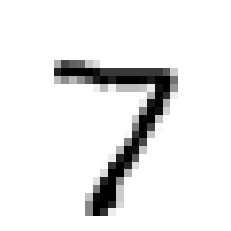

In [294]:
plt.imshow(X_test[0], cmap='gray_r', vmin=0, vmax=255)
plt.axis('off')

In [295]:
image_count_train = len(y_train)

In [296]:
BATCH_SIZE = 32
IMG_HEIGHT = 28
IMG_WIDTH = 28
STEPS_PER_EPOCH = np.ceil(image_count_train/BATCH_SIZE)

In [297]:
X_train[0].shape

(28, 28)

In [298]:
X_train_s = X_train / 255.
X_test_s = X_test / 255.

### CNN Discriminator

In [299]:
# final shape: batch size, rows, cols, channel
img_inputs = tf.keras.Input(shape=(28,28,1), batch_size=BATCH_SIZE)

In [300]:
img_inputs.get_shape()

TensorShape([32, 28, 28, 1])

In [301]:
from tensorflow.keras import layers

In [302]:
x = layers.Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1),
                  activation="relu")(img_inputs)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=32, kernel_size=(2,2),
                 activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Flatten()(x)
outputs = layers.Dense(units=10, activation="softmax")(x)

disc_model = tf.keras.Model(inputs=img_inputs, outputs=outputs, name='mnist_model')

In [303]:
disc_model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_33 (InputLayer)        [(32, 28, 28, 1)]         0         
_________________________________________________________________
conv2d_37 (Conv2D)           (32, 25, 25, 32)          544       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (32, 12, 12, 32)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (32, 11, 11, 32)          4128      
_________________________________________________________________
dropout_17 (Dropout)         (32, 11, 11, 32)          0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (32, 5, 5, 32)            0         
_________________________________________________________________
flatten_17 (Flatten)         (32, 800)                 

In [304]:
# channel is missing
X_train.shape

(60000, 28, 28)

In [305]:
# add channel
X = np.expand_dims(X_train_s,-1)
X.shape

(60000, 28, 28, 1)

In [174]:
disc_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(),
              metrics=['accuracy'])
history = disc_model.fit(X, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=5,
                   validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 15s 308us/sample - loss: 0.2420 - accuracy: 0.9269 - val_loss: 0.1025 - val_accuracy: 0.9695
Epoch 2/5
48000/48000 [==============================] - 14s 297us/sample - loss: 0.0855 - accuracy: 0.9739 - val_loss: 0.0794 - val_accuracy: 0.9777
Epoch 3/5
48000/48000 [==============================] - 14s 299us/sample - loss: 0.0658 - accuracy: 0.9795 - val_loss: 0.0608 - val_accuracy: 0.9821
Epoch 4/5
48000/48000 [==============================] - 14s 298us/sample - loss: 0.0559 - accuracy: 0.9830 - val_loss: 0.0567 - val_accuracy: 0.9845
Epoch 5/5
48000/48000 [==============================] - 14s 297us/sample - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0473 - val_accuracy: 0.9867


In [162]:
model.predict(np.expand_dims(X_test,-1))[0].argmax()

7

### expand dim
Added a feature dimension

In [23]:
a = np.array([1,1,1,1,1])
print(a)
a.shape

[1 1 1 1 1]


(5,)

In [24]:
a_exp = np.expand_dims(a,-1)

In [25]:
print(a_exp)

[[1]
 [1]
 [1]
 [1]
 [1]]


In [26]:
a_exp.shape

(5, 1)

### Generator Architecture
Needs to generate an image out of N random numbers

In [175]:
# build discriminator (fake, real); as above but just two classes --> sigmoid
# generator: samke architecture as above, but deconv

In [72]:
def noise_vector(size, n=1):
    return np.array([np.random.uniform(size=size) for i in range(n)])

In [73]:
noise_vector(10)

array([[0.79170708, 0.46052481, 0.65414726, 0.19719191, 0.9193853 ,
        0.60837298, 0.62500247, 0.2427843 , 0.08571641, 0.62737638]])

In [79]:
noise_inputs = tf.keras.Input(shape=100, batch_size=1)

In [146]:
#np.sqrt(256)
12**2

144

In [80]:
noise_inputs

<tf.Tensor 'input_8:0' shape=(1, 100) dtype=float32>

In [653]:
# https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2DTranspose?version=stable
#x = layers.Dense(100,input_shape=noise_inputs, activation="relu")(noise_inputs)
x = layers.Reshape(target_shape=(10,10,1), input_shape=noise_inputs)(noise_inputs)
x = layers.Conv2DTranspose(filters=5, kernel_size=(3,3), strides=(2,2))(x)
x = layers.Conv2DTranspose(filters=5, kernel_size=(3,3), strides=(1,1))(x)
outputs = layers.Conv2DTranspose(filters=1, kernel_size=(6,6), strides=(1,1))(x)
model = tf.keras.Model(inputs=noise_inputs, outputs=outputs, name='mnist_model')

In [654]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(1, 100)]                0         
_________________________________________________________________
reshape_107 (Reshape)        (1, 10, 10, 1)            0         
_________________________________________________________________
conv2d_transpose_223 (Conv2D (1, 21, 21, 5)            50        
_________________________________________________________________
conv2d_transpose_224 (Conv2D (1, 23, 23, 5)            230       
_________________________________________________________________
conv2d_transpose_225 (Conv2D (1, 28, 28, 1)            181       
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [92]:
input_vector = noise_vector(100)
input_vector.shape

(1, 100)

In [152]:
model.predict(input_vector).shape

(1, 28, 28, 1)

In [160]:
test = model.predict(input_vector)[0].reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

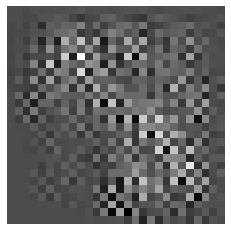

In [175]:
plt.imshow(test, cmap='gray_r')
plt.axis('off')

In [919]:
class GAN():
    
    def __init__(self, real):
        self.BATCH_SIZE = 32
        self.IMG_HEIGHT = 28
        self.IMG_WIDTH = 28
        self.CHANNELS = 1
        self.STEPS_PER_EPOCH = np.ceil(image_count_train/self.BATCH_SIZE)
        
        self.discriminator = self._set_discriminator()
        self.generator = self._set_generator()
        
        self.real = real / 255.
        
        self.discriminator_optimizer = tf.keras.optimizers.Adam(0.0005)
        self.generator_optimizer = tf.keras.optimizers.Adam(0.0005)
        
        
    def _set_discriminator(self):
        
        # input
        img_inputs = tf.keras.Input(shape=(28,28,1), batch_size=self.BATCH_SIZE)
        
        # model architecture
        x = layers.Conv2D(filters=4, kernel_size=(4,4), input_shape=(self.IMG_HEIGHT,self.IMG_WIDTH,self.CHANNELS),
                  activation="relu")(img_inputs)
        x = layers.MaxPool2D(pool_size=(2,2))(x)
        
        #x = layers.Conv2D(filters=32, kernel_size=(2,2),
        #                  activation="relu")(x)
        x = layers.Dropout(0.2)(x)
        #x = layers.MaxPool2D(pool_size=(2,2))(x)
        
        # flatten
        x = layers.Flatten()(x)
        outputs = layers.Dense(units=1, activation="sigmoid")(x)
     
        return tf.keras.Model(inputs=img_inputs, outputs=outputs, name='mnist_discriminator')
    
    def _set_generator(self):
        
        noise_inputs = tf.keras.Input(shape=(100,1), batch_size=self.BATCH_SIZE)
        x = layers.Reshape(target_shape=(10,10,1), input_shape=noise_inputs)(noise_inputs)
        x = layers.Conv2DTranspose(filters=10, kernel_size=(3,3), strides=(2,2))(x)
        x = layers.Conv2DTranspose(filters=10, kernel_size=(3,3), strides=(1,1))(x)
        outputs = layers.Conv2DTranspose(filters=1, kernel_size=(6,6), strides=(1,1))(x)

        #x = layers.Dense(10,input_shape=noise_inputs, activation="relu")(noise_inputs)
        #outputs = layers.Reshape(target_shape=(28,28,1), input_shape=noise_inputs)(x)
        #x = layers.Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(2,2))(x)
        #x = layers.Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(1,1))(x)
        #outputs = layers.Conv2DTranspose(filters=1, kernel_size=(6,6), strides=(1,1))(x)
        return tf.keras.Model(inputs=noise_inputs, outputs=outputs, name='mnist_generator')
    
    def noise_vector(self, features, size=1):
        return np.array([np.random.uniform(size=features) for i in range(size)])
    
    def show_image(self, img_array):
        plt.imshow(img_array, cmap='gray_r')
        plt.axis('off')
        
    def compile_models(self):
        self.discriminator.compile(loss="binary_crossentropy",
              optimizer=self.discriminator_optimizer,
              metrics=['accuracy'])
        #self.generator.compile()

        
    def train_discriminator(self, real_img_array, fake_img_array):
        self.unfreeze_weights(self.discriminator)
        #self.compile_models()
        
        
        # reshape real
        real_img_array = np.expand_dims(real_img_array,-1)

        print(real_img_array.shape)
        print(fake_img_array.shape)
        
        X = np.concatenate((real_img_array, fake_img_array))
        y_real = np.repeat(1, repeats=len(real_img_array))
        y_fake = np.repeat(0, repeats=len(fake_img_array))
        y = np.concatenate((y_real, y_fake))
        
        print(X.shape)
        print(y.shape)
        
        history = self.discriminator.fit(X, y,
                    batch_size=BATCH_SIZE,
                    epochs=1,
                    validation_split=0.2)
    
    def generator_loss(self,y_true, y_pred):
        ## infinite loss
        loss = K.sum(K.log(1-y_pred))
        return loss
    
    def freeze_weights(self, model):
        for layer in model.layers:
            layer.trainable = False
    
    def unfreeze_weights(self, model):
        for layer in model.layers:
            layer.trainable = True
          
    def train_generator(self, fake_data):
        
        # freeze disc
        self.freeze_weights(self.discriminator)
        
        am = tf.keras.Sequential()
        am.add(self.generator)
        am.add(self.discriminator)
        am.compile(loss="binary_crossentropy", optimizer=self.generator_optimizer, metrics=['accuracy'])
        
        #fake_data = self.noise_vector(features=100,size=1600)
        #fake_data = np.expand_dims(fake_data,-1)
        #for i in range(5):
        am.fit(fake_data, np.repeat(1, repeats=len(fake_data)), validation_split=0.2)
        #fake_img_array = self.generator.predict(fake_data)
        #y_pred_proba = np.squeeze(self.discriminator.predict(fake_img_array))
        ##loss = self.generator_loss(y_pred_proba)
        #updates_op = self.optimizer.get_updates(params=self.generator.trainable_weights, loss=self.generator_loss(y_pred_proba))
        return am
    
    def fit(self, epochs=5):
        for i in range(epochs):
            
            # train discriminator
            fake_data = self.noise_vector(features=100,size=1600)
            fake_data = np.expand_dims(fake_data,-1)
            X_fake = gan.generator.predict(fake_data)
            self.train_discriminator(self.real[:1600], X_fake)
            
            # train generator
            self.train_generator(fake_data)
            
    

In [920]:
gan = GAN(real=X_train)

In [921]:
gan.compile_models()

In [922]:
gan.discriminator.summary()

Model: "mnist_discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_206 (InputLayer)       [(32, 28, 28, 1)]         0         
_________________________________________________________________
conv2d_164 (Conv2D)          (32, 25, 25, 4)           68        
_________________________________________________________________
max_pooling2d_163 (MaxPoolin (32, 12, 12, 4)           0         
_________________________________________________________________
dropout_99 (Dropout)         (32, 12, 12, 4)           0         
_________________________________________________________________
flatten_104 (Flatten)        (32, 576)                 0         
_________________________________________________________________
dense_188 (Dense)            (32, 1)                   577       
Total params: 645
Trainable params: 645
Non-trainable params: 0
_________________________________________________

In [923]:
gan.generator.summary()

Model: "mnist_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_207 (InputLayer)       [(32, 100, 1)]            0         
_________________________________________________________________
reshape_145 (Reshape)        (32, 10, 10, 1)           0         
_________________________________________________________________
conv2d_transpose_316 (Conv2D (32, 21, 21, 10)          100       
_________________________________________________________________
conv2d_transpose_317 (Conv2D (32, 23, 23, 10)          910       
_________________________________________________________________
conv2d_transpose_318 (Conv2D (32, 28, 28, 1)           361       
Total params: 1,371
Trainable params: 1,371
Non-trainable params: 0
_________________________________________________________________


In [924]:
gan.fit()

(1600, 28, 28, 1)
(1600, 28, 28, 1)
(3200, 28, 28, 1)
(3200,)
Train on 2560 samples, validate on 640 samples
2560/2560 [==============================] - 1s 351us/sample - loss: 0.4994 - accuracy: 0.9094 - val_loss: 0.3941 - val_accuracy: 1.0000
Train on 1280 samples, validate on 320 samples
1280/1280 [==============================] - 1s 949us/sample - loss: 0.4381 - accuracy: 0.9141 - val_loss: 0.2351 - val_accuracy: 1.0000
(1600, 28, 28, 1)
(1600, 28, 28, 1)
(3200, 28, 28, 1)
(3200,)
Train on 2560 samples, validate on 640 samples
2560/2560 [==============================] - 1s 202us/sample - loss: 0.3507 - accuracy: 0.8898 - val_loss: 0.1343 - val_accuracy: 1.0000
Train on 1280 samples, validate on 320 samples
1280/1280 [==============================] - 1s 763us/sample - loss: 1.1571 - accuracy: 0.0820 - val_loss: 0.7357 - val_accuracy: 0.2281
(1600, 28, 28, 1)
(1600, 28, 28, 1)
(3200, 28, 28, 1)
(3200,)
Train on 2560 samples, validate on 640 samples
2560/2560 [====================

KeyboardInterrupt: 

In [918]:
gan.generator

In [505]:
gan.generator_loss(0,np.array([0.1,0.1,0.9,0.9]))

<tf.Tensor: shape=(), dtype=float64, numpy=-4.8158912173037445>

In [506]:
gan.compile_models()

In [507]:
#gan.generator.trainable_weights

In [758]:
gan.train_generator().summary()

Train on 12800 samples, validate on 3200 samples
12800/12800 [==============================] - 6s 443us/sample - loss: 2.1148 - accuracy: 0.0025 - val_loss: 2.0796 - val_accuracy: 3.1250e-04
Model: "sequential_163"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mnist_generator (Model)      (32, 28, 28, 1)           461       
_________________________________________________________________
mnist_discriminator (Model)  (32, 1)                   645       
Total params: 1,106
Trainable params: 461
Non-trainable params: 645
_________________________________________________________________


In [759]:
gan.generator.summary()

Model: "mnist_generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_165 (InputLayer)       [(32, 100, 1)]            0         
_________________________________________________________________
reshape_124 (Reshape)        (32, 10, 10, 1)           0         
_________________________________________________________________
conv2d_transpose_253 (Conv2D (32, 21, 21, 5)           50        
_________________________________________________________________
conv2d_transpose_254 (Conv2D (32, 23, 23, 5)           230       
_________________________________________________________________
conv2d_transpose_255 (Conv2D (32, 28, 28, 1)           181       
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [480]:
gan.compile_models()

In [481]:
gan.train_discriminator()

TypeError: train_discriminator() missing 2 required positional arguments: 'real_img_array' and 'fake_img_array'

In [748]:
X_fake = gan.noise_vector(features=100, size=12000)

In [749]:
X_fake.shape

(12000, 100)

In [870]:
fake = gan.generator.predict(np.expand_dims(X_fake,-1))
fake.shape

(12000, 28, 28, 1)

In [871]:
#gan.train_generator(X_fake)

In [872]:
np.squeeze(fake[0]).shape
img_array = np.squeeze(fake[10])
img_array.shape

(28, 28)

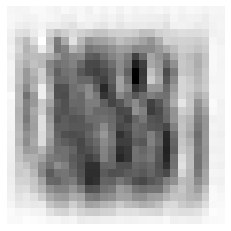

In [873]:
gan.show_image(img_array)

In [874]:
gan.discriminator.predict(fake)

array([[0.99975353],
       [0.9995646 ],
       [0.99963963],
       ...,
       [0.99988246],
       [0.9997265 ],
       [0.99931383]], dtype=float32)

In [875]:
gan.discriminator(np.expand_dims(gan.real,-1))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



<tf.Tensor: shape=(60000, 1), dtype=float32, numpy=
array([[0.9999076 ],
       [0.99998903],
       [0.8505106 ],
       ...,
       [0.9990171 ],
       [0.99846363],
       [0.9983368 ]], dtype=float32)>

In [489]:
gan.train_discriminator(gan.real, fake)

(60000, 28, 28, 1)
(12000, 28, 28, 1)
(72000, 28, 28, 1)
(72000,)
Train on 57600 samples, validate on 14400 samples
57600/57600 [==============================] - 17s 302us/sample - loss: 5.5199e-08 - accuracy: 1.0000 - val_loss: 0.6836 - val_accuracy: 0.1667
